In [1]:
pip install pysentimiento

   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   --------------------------------------- 608.4/608.4 kB 21.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ------------------------------ --------- 21.0/27.7 MB 110.7 MB/s eta 0:00:01
   ---------------------------------------  27.5/27.7 MB 97.0 MB/s eta 0:00:01
   ---------------------------------------- 27.7/27.7 MB 62.7 MB/s eta 0:00:00

   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------------------------------- 1/8 [pyarrow]
   ----- ---------


[notice] A new release of pip is available: 25.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pysentimiento import create_analyzer

c:\Users\wesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
modelo_analise_sentimento = create_analyzer(task='sentiment', lang='pt')

c:\Users\wesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wesle\.cache\huggingface\hub\models--pysentimiento--bertweet-pt-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installe

In [4]:
modelo_analise_sentimento.predict('A fritadeira é sensacional, muito além do que imaginava. É linda, super funcional e muito fácil de manusear. Fácil de limpar e potente. Super recomendo.')

AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002})

In [5]:
modelo_analise_sentimento.predict('Após poucos meses de uso de aço escovado começou a oxidar,demonstrando a baixa qualidade de proteção. Fora esse detalhe, o produto cumpre o prometido.')

AnalyzerOutput(output=NEU, probas={NEU: 0.904, NEG: 0.079, POS: 0.017})

In [6]:
modelo_analise_sentimento.predict('Em menos de 1 ano parou de funcionar, enviei para assistência técnica por estar na garantia,trocaram o motor, passou a ficar menos potente e não durou 2 utilizações.Isso se repetiu várias vezes, até que desisti de ficar levando lá e queimando de novo em seguida,vi outros clientes com o mesmo problema. Não comprem! !')

AnalyzerOutput(output=NEG, probas={NEG: 0.941, NEU: 0.044, POS: 0.015})

In [7]:
import pandas as pd

In [8]:
dados = pd.read_csv('https://raw.githubusercontent.com/T4RUM/sentiment-analysis-resenhas-pt/refs/heads/main/resenhas.csv')

In [9]:
dados

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...
5,657,"Usei ela algumas vezes já, muito silenciosa, l..."
6,182,"Superou minhas expectativas, por enquanto tudo..."
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo..."
8,343,"Estou muito satisfeito com a negociação, receb..."
9,624,Lindaaaa amei super indico


In [19]:
import os
os.environ["WANDB_DISABLED"] = "true"
from pysentimiento import create_analyzer

# Re-inicializando o modelo para aplicar a desativação do wandb
modelo_analise_sentimento = create_analyzer(task='sentiment', lang='pt')

resultados_previsao = modelo_analise_sentimento.predict(dados['Resenha'])
resultados_previsao

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}),
 AnalyzerOutput(output=NEU, probas={NE

In [22]:
sentimento = []

for resultado in resultados_previsao:
  sentimento.append(resultado.output)

In [23]:
sentimento

['POS',
 'POS',
 'POS',
 'NEG',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'POS']

In [24]:
dados['Sentimento'] = sentimento

In [25]:
dados

,ID,Resenha,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS
9,624,Lindaaaa amei super indico,POS


In [26]:
import plotly.express as px

In [27]:
df_sentimento = dados.groupby('Sentimento').size().reset_index(name='Contagem')

fig = px.bar(df_sentimento, x='Sentimento', y='Contagem', title='Contagem de Resenhas por Sentimento')

fig.show()

In [28]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
portuguese_stopwords

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_palavras(texto, coluna_texto, sentimento):
  # Filtrando as resenhas com base no sentimento especificado
  texto_sentimento = texto.query(f"Sentimento == '{sentimento}'")[coluna_texto]

  # Unindo todas as resenhas em uma única string
  texto_unido = " ".join(texto_sentimento)

  # Dividindo o texto em palavras e filtrando com stopwords
  palavras = texto_unido.split()
  palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
  texto_filtrado = " ".join(palavras_filtradas)

  # Criando e exibindo a nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_words = 50).generate(texto_filtrado)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

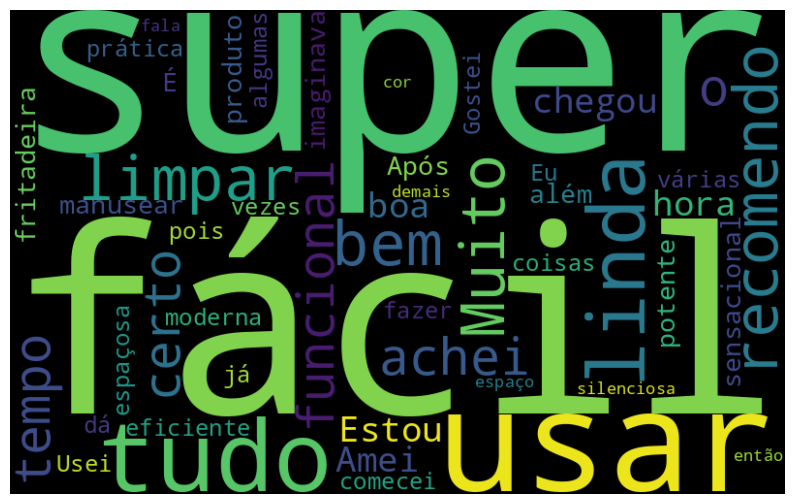

In [34]:
nuvem_palavras(dados, 'Resenha', 'POS')

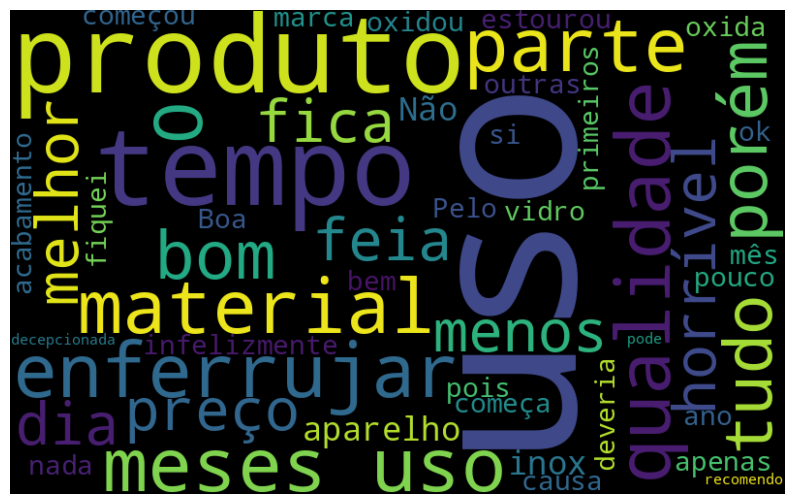

In [35]:
nuvem_palavras(dados, 'Resenha', 'NEG')